# Arena Example



In this notbook we provide easy example on how to build 2D arena shapes. 
We initialise a random agent to walk around the environement.


In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from neuralplayground.arenas.simple2d import Simple2D
from neuralplayground.arenas.connected_rooms import ConnectedRooms
from neuralplayground.utils import create_circular_wall
from neuralplayground.agents import LevyFlightAgent

In [21]:
env_name = "env_example"
time_step_size = 0.1 #seg
agent_step_size = 5

# Init environment
env = ConnectedRooms(environment_name=env_name,
                     time_step_size = time_step_size,
                     agent_step_size = agent_step_size)

In [22]:
agent = LevyFlightAgent()

In [23]:
n_steps = 10000

# Initialize environment
obs, state = env.reset()
for i in range(n_steps):
    # Observe to choose an action
    action = agent.act(obs)
    # Run environment for given action
    obs, state, reward = env.step(action)

In [24]:
env.state_dims_labels

['x_pos', 'y_pos']

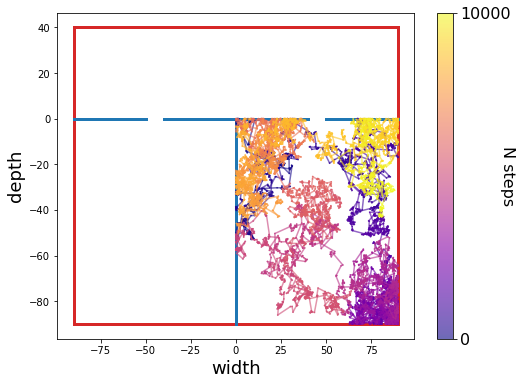

In [25]:
ax = env.plot_trajectory()
fontsize = 18
ax.grid()
# ax.legend(fontsize=fontsize, loc="upper left")
ax.set_xlabel("width", fontsize=fontsize)
ax.set_ylabel("depth", fontsize=fontsize)
plt.grid(False)
plt.savefig("two_rooms.png", bbox_inches="tight")
plt.show()

## Other room shapes

In [7]:
class TwoArms(ConnectedRooms):
    
    def _create_custom_walls(self):  
        self.custom_walls = []
        self.custom_walls.append(np.array([[-25, 0], [-25, -self.singleroom_ysize]]))
        self.custom_walls.append(np.array([[25, 0], [25, -self.singleroom_ysize]]))    
        self.custom_walls.append(np.array([[-self.singleroom_xsize, 0], [-25, 0]]))
        self.custom_walls.append(np.array([[self.singleroom_xsize, 0], [25, 0]]))

In [8]:
env_name = "two_arms"
time_step_size = 0.1 #seg
agent_step_size = 8

# Init environment
env = TwoArms(environment_name=env_name,
              time_step_size = time_step_size,
              agent_step_size = agent_step_size)

In [9]:
n_steps = 30000

# Initialize environment
obs, state = env.reset(custom_state=[0,0])
for i in range(n_steps):
    # Observe to choose an action
    action = agent.act(obs)
    # Run environment for given action
    obs, state, reward = env.step(action)

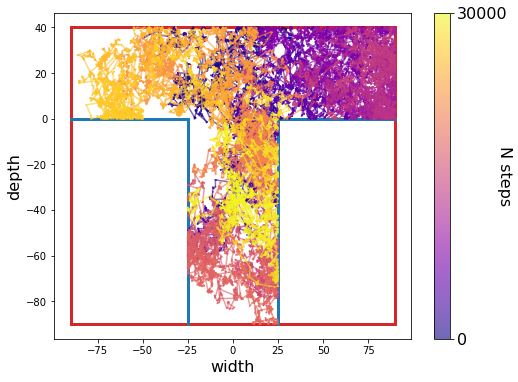

In [10]:
ax = env.plot_trajectory()
fontsize = 16
ax.grid()
# ax.legend(fontsize=fontsize, loc="upper left")
ax.set_xlabel("width", fontsize=fontsize)
ax.set_ylabel("depth", fontsize=fontsize)
plt.grid(False)
plt.savefig("two_arms.png", bbox_inches="tight")
plt.show()

In [11]:
class CircularArena(Simple2D):
    
    def _create_custom_walls(self):
        self.custom_walls = create_circular_wall(center=np.array([0, 0]), radius=50)
        self.custom_walls += create_circular_wall(center=np.array([0, 0]), radius=75)

In [12]:
env_name = "two_arms"
time_step_size = 0.1 #seg
agent_step_size = 5
arena_x_limits = np.array((-100, 100))
arena_y_limits = np.array((-100, 100))

# Init environment
env = CircularArena(environment_name=env_name,
                    time_step_size = time_step_size,
                    agent_step_size = agent_step_size,
                    arena_x_limits=arena_x_limits,
                    arena_y_limits=arena_y_limits)

In [13]:
n_steps = 30000

# Initialize environment
obs, state = env.reset(custom_state=[-70,0])
for i in range(n_steps):
    # Observe to choose an action
    action = agent.act(obs)
    # Run environment for given action
    obs, state, reward = env.step(action)

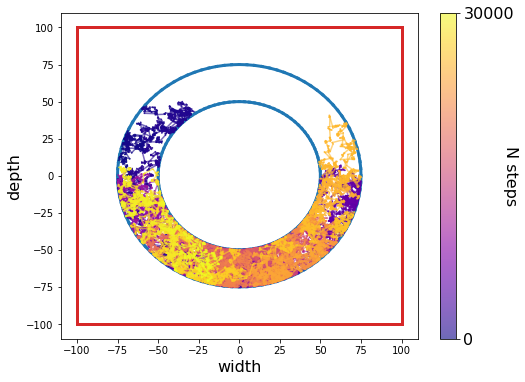

In [14]:
ax = env.plot_trajectory()
fontsize = 16
ax.grid()
# ax.legend(fontsize=fontsize, loc="upper left")
ax.set_xlabel("width", fontsize=fontsize)
ax.set_ylabel("depth", fontsize=fontsize)
plt.grid(False)
plt.savefig("circle.png", bbox_inches="tight")
plt.show()